In [2]:
#numpyのインストール
import numpy as np
#pandasのインストール
import pandas as pd
#statistics
import statistics as st
#statsmodelsのインストール
import statsmodels.api as sm
#scikit-learnのインストール
import sklearn.linear_model as sl
#pyplotのインストール
import matplotlib.pyplot as plt
#seabornのインストール
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('data3.csv')
df.shape
#195×19次元

(183, 19)

In [4]:
df.head(10)

,year,avg_temp,avg_temp1,avg_temp2,sun,sun1,sun2,sun3,avg_wind,avg_wind1,avg_wind2,avg_cloud_quantity,avg_cloud_quantity1,avg_cloud_quantity2,rain_sum,rain_sum1,rain_sum2,rain_sum3,Year
0,2001/1/1,4.6,8,1,173.9,0,8,1,4.1,8,1,5.0,8,1,146.5,0,8,1,NaN
1,2001/2/1,6.2,8,1,146.9,0,8,1,3.6,8,1,6.1,8,1,38.5,0,8,1,NaN
2,2001/3/1,9.4,8,1,181.3,0,8,1,4.1,8,1,5.9,8,1,133.5,0,8,1,NaN
3,2001/4/1,15.0,8,1,226.6,0,8,1,3.9,8,1,5.6,8,1,64.0,0,8,1,NaN
4,2001/5/1,18.7,8,1,170.0,0,8,1,3.5,8,1,7.6,8,1,194.5,0,8,1,NaN
5,2001/6/1,22.2,8,1,114.5,0,8,1,3.0,8,1,8.8,8,1,141.0,0,8,1,NaN
6,2001/7/1,27.4,8,1,275.5,0,8,1,3.9,8,1,5.9,8,1,46.5,0,8,1,NaN
7,2001/8/1,25.8,8,1,132.8,0,8,1,2.8,8,1,8.4,8,1,162.5,0,8,1,NaN
8,2001/9/1,22.6,8,1,119.0,0,8,1,3.2,8,1,7.6,8,1,215.5,0,8,1,NaN
9,2001/10/1,18.1,8,1,149.4,0,8,1,3.3,8,1,6.4,8,1,306.5,0,8,1,NaN


In [5]:
w_data = df.loc[:,['year','avg_temp','sun','avg_wind','rain_sum','avg_cloud_quantity']]
#年月ごとのグラフ化
m_data = w_data.groupby('year').mean()
v_data = w_data.groupby('year').var()

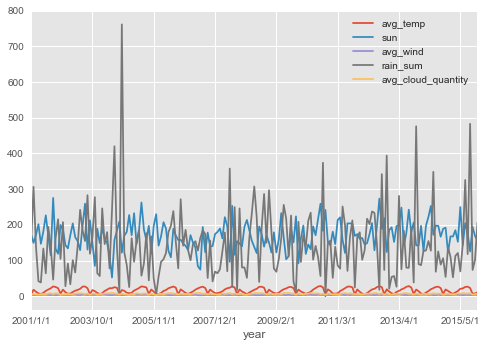

In [6]:
plt.style.use('ggplot') 
m_data.plot()

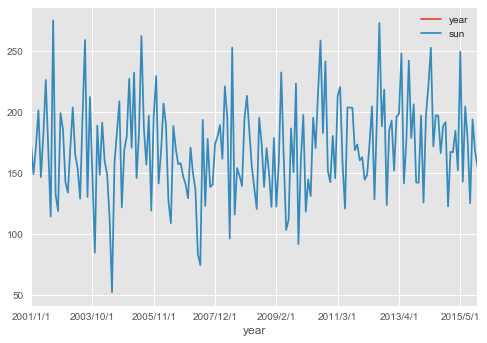

In [7]:
sun_data = m_data.loc[:,['year','sun']]
sun_data.plot()

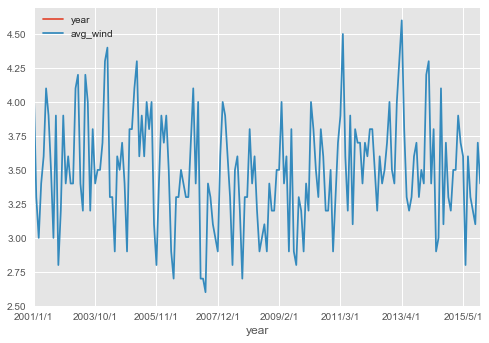

In [8]:
wind_data = m_data.loc[:,['year','avg_wind']]
wind_data.plot()

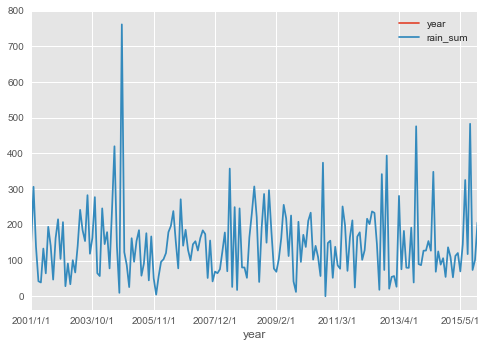

In [9]:
rain_data = m_data.loc[:,['year','rain_sum']]
rain_data.plot()

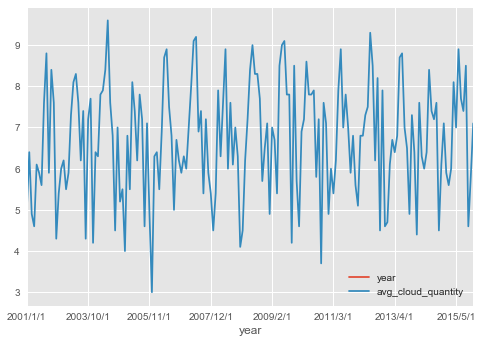

In [10]:
rain_data = m_data.loc[:,['year','avg_cloud_quantity']]
rain_data.plot()

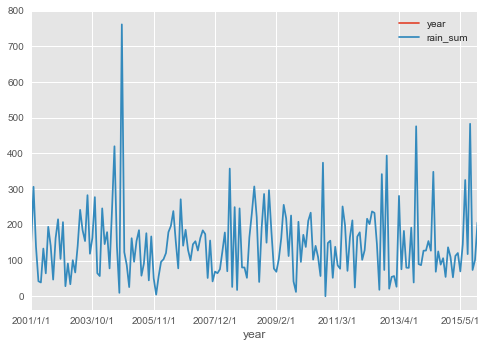

In [11]:
rain_data = m_data.loc[:,['year','rain_sum']]
rain_data.plot()

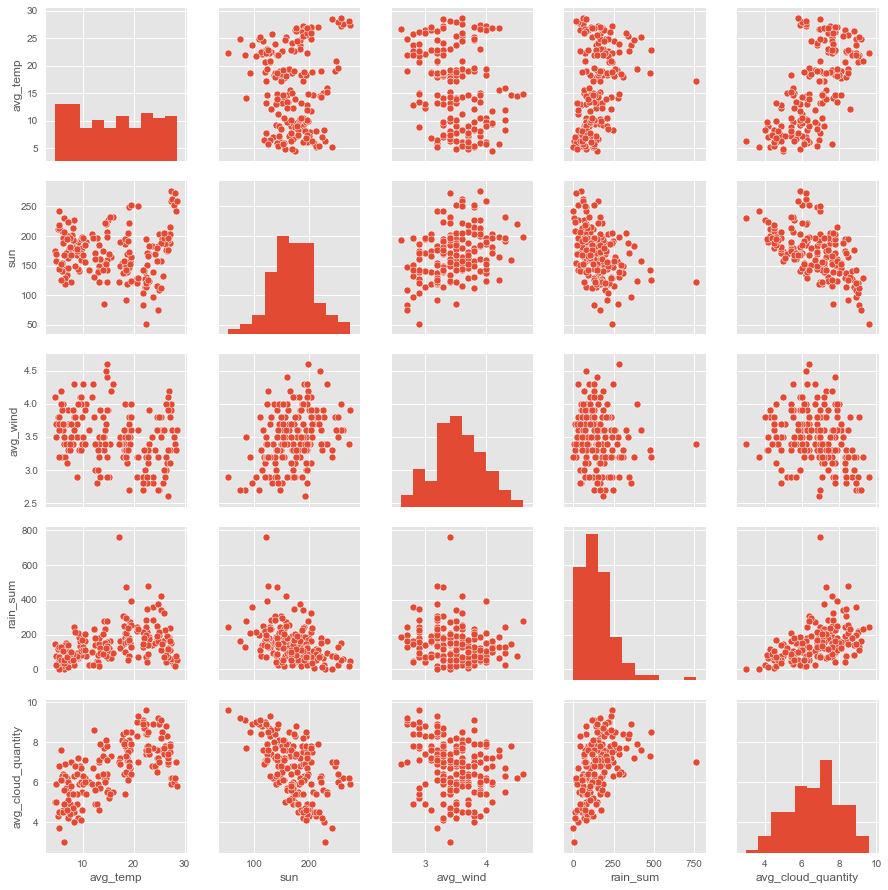

In [12]:
sns.pairplot(m_data)

In [13]:
correlation_matrix = np.corrcoef(m_data.transpose())

In [14]:
names = ['avg_temp','sun','avg_wind','rain_sum','cloud_quantity']

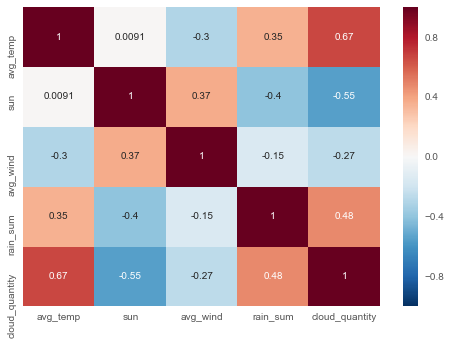

In [15]:
sns.heatmap(correlation_matrix, annot=True, xticklabels=names,yticklabels=names)

In [16]:
w_data = w_data.drop(['avg_cloud_quantity'],axis=1)

In [17]:
w_data['year'] = w_data['year'].str.split('/', expand=True)

In [18]:
var_temp = w_data.groupby('year')['avg_temp'].agg(['std'])
var_temp.head()

,std
year,
2001,7.786974
2002,7.339118
2003,7.139752
2004,7.423591
2005,7.816004


In [19]:
sum_all = w_data.groupby('year')['avg_temp','rain_sum','sun','avg_wind'].agg(['sum'])
sum_all.head()

,avg_temp,rain_sum,sun,avg_wind
,sum,sum,sum,sum
year,,,,
2001,190.4,1630.5,2063.6,41.8
2002,193.7,1638.0,2073.9,44.0
2003,187.0,2132.5,1794.3,43.2
2004,202.4,1932.0,2247.9,44.9
2005,189.5,1411.0,2045.1,40.5


In [20]:
cd_df = pd.concat([var_temp,sum_all], axis=1)
cd_df.head()

,std,"(avg_temp, sum)","(rain_sum, sum)","(sun, sum)","(avg_wind, sum)"
year,,,,,
2001,7.786974,190.4,1630.5,2063.6,41.8
2002,7.339118,193.7,1638.0,2073.9,44.0
2003,7.139752,187.0,2132.5,1794.3,43.2
2004,7.423591,202.4,1932.0,2247.9,44.9
2005,7.816004,189.5,1411.0,2045.1,40.5


In [21]:
cd_value = cd_df.values
cd_pd = pd.DataFrame(cd_value)
cd_pd.head()

,0,1,2,3,4
0,7.786974,190.4,1630.5,2063.6,41.8
1,7.339118,193.7,1638.0,2073.9,44.0
2,7.139752,187.0,2132.5,1794.3,43.2
3,7.423591,202.4,1932.0,2247.9,44.9
4,7.816004,189.5,1411.0,2045.1,40.5


In [22]:
cd_pd.columns = ['var_temp','sum_temp','sum_sun','sum_wind','sum_rain']
cd_pd.head()

,var_temp,sum_temp,sum_sun,sum_wind,sum_rain
0,7.786974,190.4,1630.5,2063.6,41.8
1,7.339118,193.7,1638.0,2073.9,44.0
2,7.139752,187.0,2132.5,1794.3,43.2
3,7.423591,202.4,1932.0,2247.9,44.9
4,7.816004,189.5,1411.0,2045.1,40.5


In [28]:
econ = pd.read_csv('econ2.csv',delimiter=',')

In [29]:
econ.head()

,year,money
0,2001,35.7
1,2002,37.9
2,2003,38.0
3,2004,36.3
4,2005,35.0


In [32]:
yt_data = pd.concat([econ,cd_pd], axis=1)
yt_data

,year,money,var_temp,sum_temp,sum_sun,sum_wind,sum_rain
0,2001.0,35.7,7.786974,190.4,1630.5,2063.6,41.8
1,2002.0,37.9,7.339118,193.7,1638.0,2073.9,44.0
2,2003.0,38.0,7.139752,187.0,2132.5,1794.3,43.2
3,2004.0,36.3,7.423591,202.4,1932.0,2247.9,44.9
4,2005.0,35.0,7.816004,189.5,1411.0,2045.1,40.5
5,2006.0,33.4,7.425075,191.5,1856.0,1667.4,40.1
6,2007.0,36.0,7.130743,198.3,1464.5,2046.0,40.6
7,2008.0,37.8,7.465679,193.2,1919.0,1957.4,38.4
8,2009.0,39.2,6.962867,195.4,1894.0,1854.1,40.2
9,2010.0,37.2,7.899880,198.5,1855.5,2094.0,41.2


In [ ]:
yt_data.drop([14,15],axis=)